# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=86e091696d04e4636555f97b1ff31889&units=metric&q='

In [4]:
# set lists for the dataframe
city_list = []
city_number = []
country = []
cloudiness = []
dates = []
humidity = []
lat = []
lon = []
temp = []
max_temp = []
wind_speed = []
country = []

# set initial count quantities for organization
counter = 0

# loop for creating dataframe columns
for city in cities:
    
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        city_number.append(response['id'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        dates.append(response['dt'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
        if counter > 1000:
            counter = 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
            print(f"Record {counter} | City Name = {city}")
        
    except Exception:
        print("No city found.")
        
print("-------------------Data Retrival Job Complete-------------------")

Record 1 | City Name = santa fe
Record 2 | City Name = egvekinot
Record 3 | City Name = kodiak
Record 4 | City Name = manosque
Record 5 | City Name = ancud
No city found.
Record 6 | City Name = saskylakh
Record 7 | City Name = sola
Record 8 | City Name = ulladulla
Record 9 | City Name = roma
Record 10 | City Name = mataura
Record 11 | City Name = ushuaia
Record 12 | City Name = mar del plata
Record 13 | City Name = uchiza
Record 14 | City Name = cape town
Record 15 | City Name = kotelnich
Record 16 | City Name = cherskiy
Record 17 | City Name = dikson
Record 18 | City Name = inhambane
Record 19 | City Name = lewistown
Record 20 | City Name = esperance
Record 21 | City Name = arraial do cabo
Record 22 | City Name = hobart
Record 23 | City Name = touros
Record 24 | City Name = qaanaaq
Record 25 | City Name = upernavik
Record 26 | City Name = punta arenas
Record 27 | City Name = hami
Record 28 | City Name = albany
Record 29 | City Name = busselton
Record 30 | City Name = tuatapere
Record 

Record 231 | City Name = dawson creek
Record 232 | City Name = noumea
Record 233 | City Name = lishu
No city found.
Record 234 | City Name = bereda
Record 235 | City Name = ati
Record 236 | City Name = longyearbyen
Record 237 | City Name = hongjiang
Record 238 | City Name = bambous virieux
Record 239 | City Name = talnakh
Record 240 | City Name = kahului
Record 241 | City Name = acapulco
Record 242 | City Name = flinders
Record 243 | City Name = cartagena
Record 244 | City Name = bam
Record 245 | City Name = cabo san lucas
Record 246 | City Name = greymouth
Record 247 | City Name = havoysund
Record 248 | City Name = doka
Record 249 | City Name = moose factory
Record 250 | City Name = whitianga
Record 251 | City Name = pisco
Record 252 | City Name = dingle
Record 253 | City Name = praya
Record 254 | City Name = taoudenni
Record 255 | City Name = mizdah
Record 256 | City Name = kavieng
Record 257 | City Name = tanout
Record 258 | City Name = norman wells
Record 259 | City Name = sisimiut

Record 464 | City Name = gouyave
Record 465 | City Name = erenhot
Record 466 | City Name = loding
Record 467 | City Name = grand-lahou
Record 468 | City Name = goulburn
No city found.
Record 469 | City Name = sungaipenuh
Record 470 | City Name = sioux city
Record 471 | City Name = pimentel
No city found.
Record 472 | City Name = dukat
Record 473 | City Name = arenal
Record 474 | City Name = imeni poliny osipenko
Record 475 | City Name = mookane
Record 476 | City Name = port hawkesbury
Record 477 | City Name = kloulklubed
Record 478 | City Name = vardo
Record 479 | City Name = pacifica
Record 480 | City Name = yanam
Record 481 | City Name = nanakuli
Record 482 | City Name = bilma
Record 483 | City Name = calama
Record 484 | City Name = cognac
Record 485 | City Name = matara
Record 486 | City Name = sweetwater
No city found.
Record 487 | City Name = agnibilekrou
No city found.
Record 488 | City Name = turbat
Record 489 | City Name = namtsy
Record 490 | City Name = yadgir
Record 491 | Cit

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [5]:
# create a data frame from cities, lat, and temp

weather_dict = {
    
    "city": city_list,
    "country": country, 
    "city id": city_number,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed,

}
city_weather_data = pd.DataFrame(weather_dict)
city_weather_data

,city,country,city id,lat,lon,temp,temp_max,humidity,cloudiness,wind speed
0,santa fe,PH,1688420,17.49,120.43,26.13,26.13,82,7,1.63
1,egvekinot,RU,4031742,66.32,-179.17,10.70,10.70,84,38,0.74
2,kodiak,US,5866583,57.79,-152.41,14.00,14.00,76,90,1.50
3,manosque,FR,2996180,43.83,5.79,25.00,25.00,51,99,0.89
4,ancud,CL,3899695,-41.87,-73.82,10.78,11.67,93,90,5.10
...,...,...,...,...,...,...,...,...,...,...
557,yangambi,CD,203717,0.81,24.43,23.24,23.24,84,100,1.12
558,nicolas bravo,HT,3728097,18.23,-73.82,30.51,30.51,60,8,3.53
559,omboue,GA,2396853,-1.57,9.26,22.87,22.87,87,100,3.61
560,koumac,NC,2140558,-20.57,164.28,18.01,18.01,65,21,1.43


In [6]:
city_weather_data.to_csv('city_weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

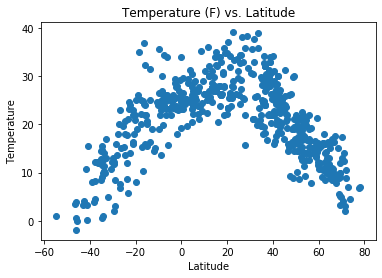

In [8]:
#Temperature (F) vs. Latitude
lat_values = city_weather_data['lat']
temp_values = city_weather_data['temp']
plt.scatter(lat_values,temp_values)
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

#### Latitude vs. Humidity Plot

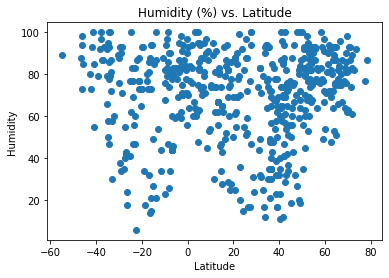

In [9]:
# Humidity (%) vs. Latitude
lat_values = city_weather_data['lat']
humidity_values = city_weather_data['humidity']
plt.scatter(lat_values,humidity_values)
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

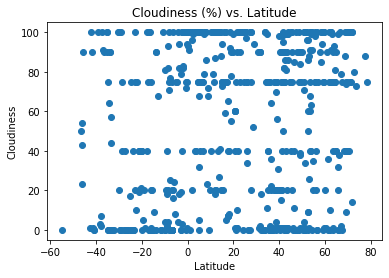

In [10]:
# Cloudiness (%) vs. Latitude
lat_values = city_weather_data['lat']
cloudiness_values = city_weather_data['cloudiness']
plt.scatter(lat_values,cloudiness_values)
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

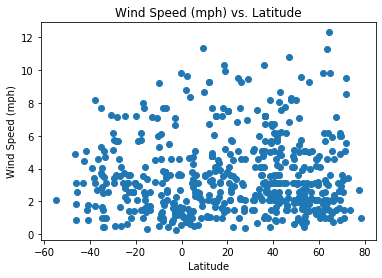

In [11]:
#Wind Speed (mph) vs. Latitude
lat_values = city_weather_data['lat']
windspeed_values = city_weather_data['wind speed']
plt.scatter(lat_values,windspeed_values)
plt.title('Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(lat_values, windspeed_values)

# Get regression values
regress_values = lat_values * slope + intercept
print(regress_values)

In [ ]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

In [12]:
# Setting Northern Hemisphere Conditions for DataFrame
northern_hem = city_weather_data.lat >= 0
northern_hem.head(20)

0      True
1      True
2      True
3      True
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11     True
12    False
13    False
14     True
15     True
16     True
17    False
18     True
19    False
Name: lat, dtype: bool

In [13]:
# Nothern Hemisphere DataFrame
northern_hemisphere_df = city_weather_data[northern_hem]
northern_hemisphere_df

,city,country,city id,lat,lon,temp,temp_max,humidity,cloudiness,wind speed
0,santa fe,PH,1688420,17.49,120.43,26.13,26.13,82,7,1.63
1,egvekinot,RU,4031742,66.32,-179.17,10.70,10.70,84,38,0.74
2,kodiak,US,5866583,57.79,-152.41,14.00,14.00,76,90,1.50
3,manosque,FR,2996180,43.83,5.79,25.00,25.00,51,99,0.89
5,saskylakh,RU,2017155,71.92,114.08,8.80,8.80,61,100,9.51
...,...,...,...,...,...,...,...,...,...,...
551,jibuti,DJ,223816,11.50,42.50,36.00,36.00,30,75,2.10
554,sidi qasim,CF,2385535,5.08,19.88,22.05,22.05,95,100,1.44
557,yangambi,CD,203717,0.81,24.43,23.24,23.24,84,100,1.12
558,nicolas bravo,HT,3728097,18.23,-73.82,30.51,30.51,60,8,3.53


In [14]:
# Setting Southern Hemisphere Conditions for DataFrame
southern_hem = city_weather_data.lat <= 0
southern_hem.head(10)

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7     True
8    False
9     True
Name: lat, dtype: bool

In [15]:
# Southern Hemisphere DataFrame
southern_hemisphere_df = city_weather_data[southern_hem]
southern_hemisphere_df 

,city,country,city id,lat,lon,temp,temp_max,humidity,cloudiness,wind speed
4,ancud,CL,3899695,-41.87,-73.82,10.78,11.67,93,90,5.10
6,sola,VU,2134814,-13.88,167.55,25.00,25.00,100,90,2.60
7,ulladulla,AU,2145554,-35.35,150.47,8.44,11.67,66,90,7.70
9,mataura,NZ,6201424,-46.19,168.86,-1.85,-1.85,98,23,0.88
10,ushuaia,AR,3833367,-54.80,-68.30,1.00,1.00,89,0,2.10
...,...,...,...,...,...,...,...,...,...,...
553,barabai,ID,1650064,-2.58,115.38,23.11,23.11,91,100,0.28
555,mazagao,BR,3395042,-0.12,-51.29,34.00,34.00,56,75,3.60
556,namatanai,PG,2090021,-3.67,152.43,26.02,26.02,81,18,1.62
559,omboue,GA,2396853,-1.57,9.26,22.87,22.87,87,100,3.61


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

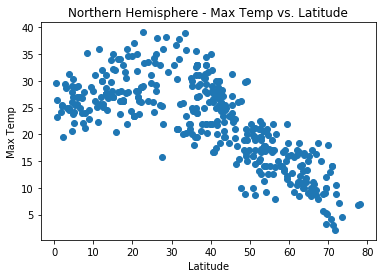

In [16]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
northern_lat_values = northern_hemisphere_df['lat']
northern_max_temp_values = northern_hemisphere_df['temp_max']
plt.scatter(northern_lat_values,northern_max_temp_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [17]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat_values, northern_max_temp_values)

# Get regression values
regress_values = northern_lat_values * slope + intercept
print(regress_values)

0      28.291549
1      14.573971
2      16.970263
3      20.891979
5      13.000790
         ...    
551    29.974291
554    31.777831
557    32.977382
558    28.083665
561    18.324323
Name: lat, Length: 395, dtype: float64


In [18]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.28x +33.2


The r-squared is: 0.5150961023306362


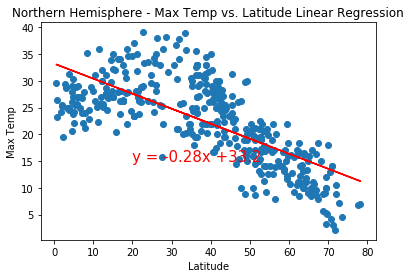

In [19]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Create Plot
plt.scatter(northern_lat_values,northern_max_temp_values)
plt.plot(northern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

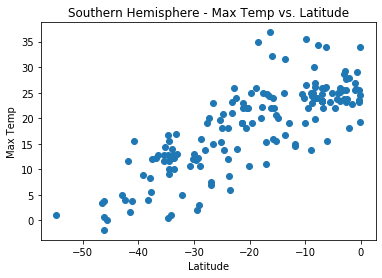

In [20]:
# Southern Hemisphere - Max Temp vs. Latitude 
southern_lat_values = southern_hemisphere_df['lat']
southern_max_temp_values = southern_hemisphere_df['temp_max']
plt.scatter(southern_lat_values,southern_max_temp_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [21]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat_values, southern_max_temp_values)

# Get regression values
regress_values = southern_lat_values * slope + intercept
print(regress_values)

4       7.294956
6      21.166092
7      10.526103
9       5.154073
10      0.887175
         ...    
553    26.766086
555    27.985199
556    26.225909
559    27.266616
560    17.850697
Name: lat, Length: 167, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.5x +28.04


The r-squared is: 0.6377817310219233


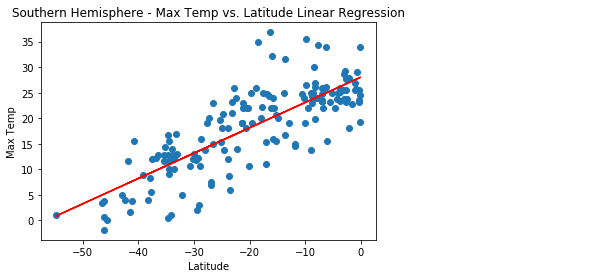

In [23]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Create Plot
plt.scatter(southern_lat_values,southern_max_temp_values)
plt.plot(southern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

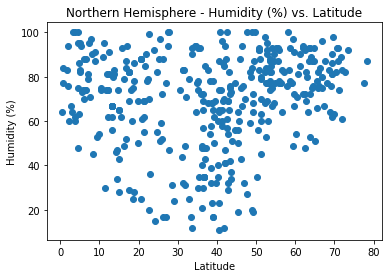

In [24]:
# Northern Hemisphere - Humidity (%) vs. Latitude
northern_lat_values = northern_hemisphere_df['lat']
northern_humidity_values = northern_hemisphere_df['humidity']
plt.scatter(northern_lat_values,northern_humidity_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [25]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat_values, northern_humidity_values)

# Get regression values
regress_values = northern_lat_values * slope + intercept
print(regress_values)

0      66.928507
1      72.855965
2      71.820511
3      70.125911
5      73.535747
         ...    
551    66.201382
554    65.422061
557    64.903727
558    67.018335
561    71.235413
Name: lat, Length: 395, dtype: float64


In [26]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.12x +64.81


The r-squared is: 0.013009304962868187


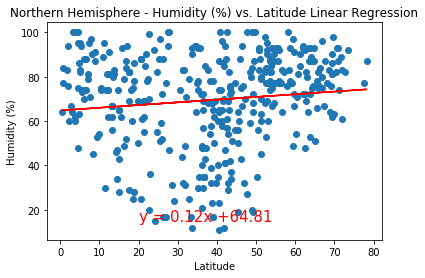

In [27]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Create Plot
plt.scatter(northern_lat_values,northern_humidity_values)
plt.plot(northern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

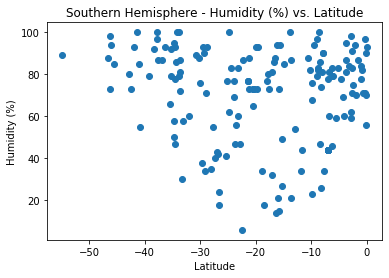

In [28]:
# Southern Hemisphere - Humidity (%) vs. Latitude
southern_lat_values = southern_hemisphere_df['lat']
southern_humidity_values = southern_hemisphere_df['humidity']
plt.scatter(southern_lat_values,southern_humidity_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [29]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat_values, southern_humidity_values)

# Get regression values
regress_values = southern_lat_values * slope + intercept
print(regress_values)

4      74.446201
6      69.296659
7      73.246665
9      75.240985
10     76.825035
         ...    
553    67.217708
555    66.765122
556    67.418244
559    67.031890
560    70.527471
Name: lat, Length: 167, dtype: float64


In [30]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.18x +66.74


The r-squared is: 0.011696622886680986


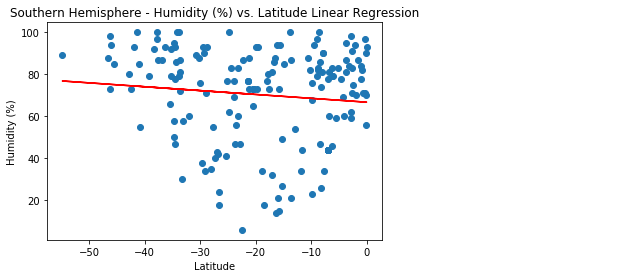

In [31]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Create Plot
plt.scatter(southern_lat_values,southern_humidity_values)
plt.plot(southern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

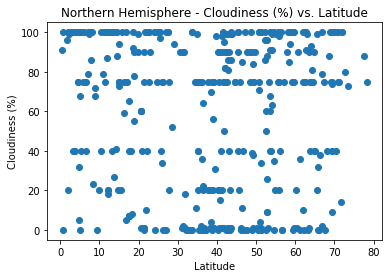

In [32]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
northern_lat_values = northern_hemisphere_df['lat']
northern_cloudiness_values = northern_hemisphere_df['cloudiness']
plt.scatter(northern_lat_values,northern_cloudiness_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [33]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat_values, northern_cloudiness_values)

# Get regression values
regress_values = northern_lat_values * slope + intercept
print(regress_values)

0      59.759284
1      53.390097
2      54.502715
3      56.323601
5      52.659655
         ...    
551    60.540595
554    61.377994
557    61.934956
558    59.662761
561    55.131417
Name: lat, Length: 395, dtype: float64


In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.13x +62.04


The r-squared is: 0.004493463189954545


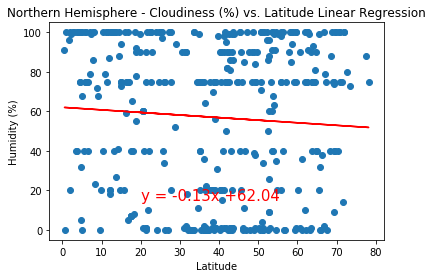

In [35]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Create Plot
plt.scatter(northern_lat_values,northern_cloudiness_values)
plt.plot(northern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

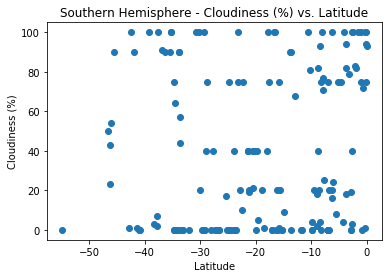

In [36]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
southern_lat_values = southern_hemisphere_df['lat']
southern_cloudiness_values = southern_hemisphere_df['cloudiness']
plt.scatter(southern_lat_values,southern_cloudiness_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

In [37]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat_values, southern_cloudiness_values)

# Get regression values
regress_values = southern_lat_values * slope + intercept
print(regress_values)

4      32.511546
6      39.935373
7      34.240855
9      31.365747
10     29.082104
         ...    
553    42.932488
555    43.584957
556    42.643385
559    43.200371
560    38.160975
Name: lat, Length: 167, dtype: float64


In [38]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.27x +43.62


The r-squared is: 0.007978563416718586


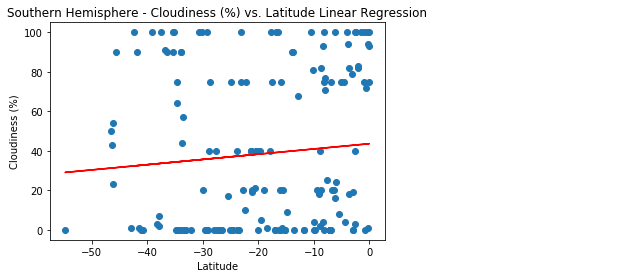

In [39]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Create Plot
plt.scatter(southern_lat_values,southern_cloudiness_values)
plt.plot(southern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

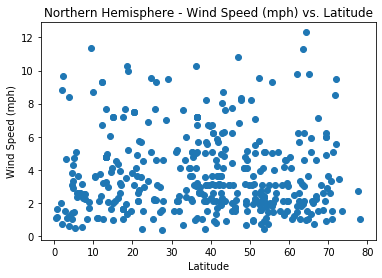

In [40]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
northern_lat_values = northern_hemisphere_df['lat']
northern_windspeed_values = northern_hemisphere_df['wind speed']
plt.scatter(northern_lat_values,northern_windspeed_values)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [41]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_lat_values, northern_windspeed_values)

# Get regression values
regress_values = northern_lat_values * slope + intercept
print(regress_values)

0      3.807678
1      3.625322
2      3.657177
3      3.709311
5      3.604409
         ...   
551    3.830048
554    3.854024
557    3.869970
558    3.804915
561    3.675178
Name: lat, Length: 395, dtype: float64


In [42]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.0x +3.87


The r-squared is: 0.0009510008376666432


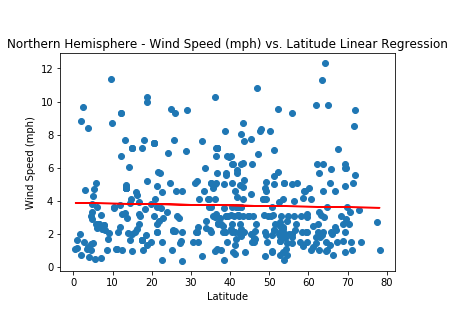

In [43]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Create Plot
plt.scatter(northern_lat_values,northern_windspeed_values)
plt.plot(northern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

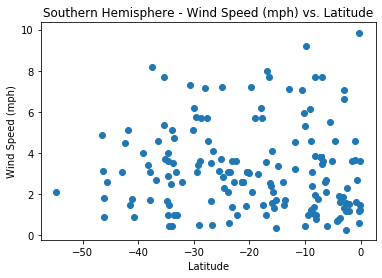

In [44]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude 
southern_lat_values = southern_hemisphere_df['lat']
southern_windspeed_values = southern_hemisphere_df['wind speed']
plt.scatter(southern_lat_values,southern_windspeed_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [45]:
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_lat_values, southern_windspeed_values)

# Get regression values
regress_values = southern_lat_values * slope + intercept
print(regress_values)

4      3.370114
6      3.205487
7      3.331766
9      3.395522
10     3.446163
         ...   
553    3.139025
555    3.124556
556    3.145436
559    3.133084
560    3.244835
Name: lat, Length: 167, dtype: float64


In [46]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.01x +3.12


The r-squared is: 0.0014609914459621477


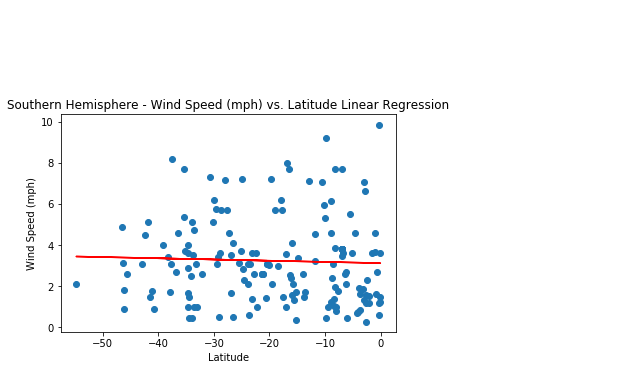

In [47]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Create Plot
plt.scatter(southern_lat_values,southern_windspeed_values)
plt.plot(southern_lat_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()